# ITMAL Exercise

REVISIONS| |
---------| |
2018-1219| CEF, initial.                  
2018-0214| CEF, major update and put in sync with under/overfitting exe.         
2018-0220| CEF, fixed revision table malformatting.
2018-0225| CEF, minor text updates, and made Qc optional.
2018-0225| CEF, updated code, made more functions.
2018-0311| CEF, corrected RSME to RMSE.
2019-1008| CEF, updated to ITMAL E19.

## Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning, Ian Goodfellow, et. al. [DL], that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/E19_itmal/L07/Figs/dl_generalization_error.png" style="height:500px">

### Qa On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

In [5]:
#### TODO: Qa...in text
- Training/generalization error
The error of a model tells you how good the predictions from the model fit to the actual values. The error does not have to be a
specific measure/formula it can be any of the methods tha are available, so for example the Root-mean-square-error is a way to 
measure the error/distance between the actual value and the predicted value.
In general the error fro the training set, and then the error for trying out the model on fresh data or the validation data set, 
will not match completely. Just because the errors do not match, it does not mean that you have to try to optimize the training error
on the specific set, since in reality, the model with that error might actually be a good generalized model to use, as long as
the traning error is close to having the same value as the generalized error, and the model fits different datasets so that it can 
predict outcome values that are close to the actual values. 

- Underfit/overfit zone
The underfitting zone is where the dataset is "underrepresented". The features for the dataset are not representative enough
of the dataset as a whole, since the model has output values which are very different from the actual values, meaning the error is 
of a high value for the model. This can lead to multiple issues, where it is hard to use the model on other datasets and make it into
a generalized model, because (as mentioned earlier) the model can barely represent one dataset (training). 

The overfitting zone is where the model is too "representative" of the dataset. This holds true when there are too many features
taken into account, when some features do not even represent the dataset as a whole, and therefore when trying to fit the model to
other datasets, it will again result in a higher value of error and the model cannot be generalized. 

- Optimal capaciy
When speaking of polynomials, the model is also influenced by the the degrees on the polynomial which the model can be based off.
The amount of "degrees" of the polynomial can be called the capacity of the model. The higher of a degree the polynomial has the
higher the capacity is. The capacity influences the "fit" of the model, to low of a capacity can result in underfitting model, and
if the capacity is too high, the model can be overfit to a specific dataset. Optimal capacity is when the model has a capacity which
ensures the model can be generalized to predict outcomes from different datasets, meaning the "degree" of the polynomia has a value
that ensures that the errors between the training data and other dataset is not too different from each other, and that the model
can be used as a generalized model to fit and predict values from other data sets. 

- Generalization gap
If the errors between the training data and other other data sets are to distant, this will result in a generalization gap, which
can be due to the fact that the model is either underfitting or overfitting the datasets (most likely overfitting). 

- x/capacity, y/error.
Figure 5.3 illustrates the different phenomena covered in this section, and the result of them. It illustrates that underfitting, 
might give too big of an error on other data sets as well as training data sets, since the model "underrepresents" the data sets
by underfitting to the data. Overfitting happens when the model "overrepresents" the traning data and minimizes the error on training
sets the more features are included, but the error on other data sets keep rising. When hitting the optimal capacity, even if there 
is a difference in the error, the values are not very different, and represent the datasets well, whether it be the training or other
data sets. 

SyntaxError: invalid syntax (<ipython-input-5-3d1fa4c75948>, line 2)

### Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE: the generalization plot above (figure 5.3 in [DL]) and the plots below have different x-axis, and are not to be compared directly!

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


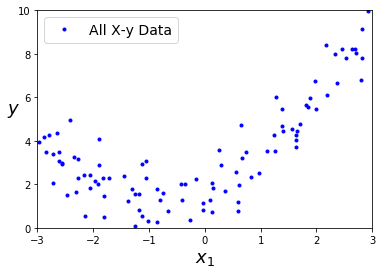

OK


In [6]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [ ]:
In part 1, the focus is towards preparing the data that needs to be tested on. As per the scikit documentation the standardsscaler
"Standardize features by removing the mean and scaling to unit variance". The Polynomial is a 90 degree polynomial which is then 
fitted to the training and validation data. 

In [7]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        sgd_reg.fit(X_train, y_train)
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        #if verbose:
            #print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
OK


In [ ]:
The function train in this part, takes the respective data sets for the training and validation, but also n_epochs. 
n_epochs is a hyperparameter of gradient descent that controls the amount of passes through the data set(s), 
reference: "https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/". This means that since this is a gradient 
descent operation, it will pass through the dataset n_epochs amount of times trying to find the best possible model. This will 
be done with an initial learning rate of eta0=0.0005, and thereafter the last result is compared to the current run result and the 
learning rate is then adjusted. By doing this the best model is found by minimizing the errors whilst also not creating too much 
of a generalization gap from overfitting. 

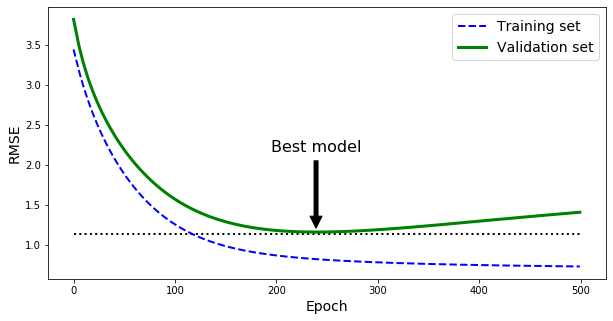

In [8]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [ ]:
# TODO: Qb...code review in text form
The way that the best model is found, is by finding the minimum value of the error in the validation set, and that is where the
best model is found. 

### [OPTIONAL] Qc  Early Stopping

How would you implement ___early stopping___, in the code above? 

Try it out in the code, and write an explanation of the early stopping concept.

In [ ]:
# TODO: Qc...

### Qd Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below, and explain the generated RMSE-Capacity plot. Why does the _training error keep dropping_, while the _CV-error drops_ until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10?

Iterating...degrees= [1, 4, 15]
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=  15, rmse_training=0.07, rmse_cv=13520.93


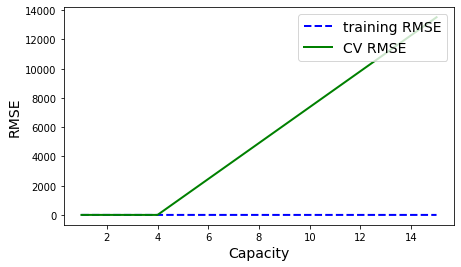

OK


In [10]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    degrees = [1, 4, 15]
    #degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_cv= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_cv=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_cv:4.2f}")
    
    capacities    .append(d)
    rmses_training.append(rmse_training)
    rmses_cv      .append(rmse_cv)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training, "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_cv, "g-", linewidth=2, label="CV RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

In [ ]:
# TODO: Qd...answer in text form
The training error keeps dropping the higher the capacity/degree is, because as the degrees increase the more the model is overfitting 
to the dataset. The model is including features which are outliers and the model fits the data even 
more, resulting in minimizing the error the more features are included. Increasing the degrees does have its downside as the model does 
not fit other datasets well and cannot be used as a generalized model, where the error increases since the outliers are no longer important 
when handling other datasets. 
The CV error increases after the optimal capacity (around 3), since the model is overfitting to the training data and is no longer a good
representation of other general data sets. 
The axis represent the capacity/degreee of the model that comes from fitting to the training set, and the RMSE is the error indication
between the actual and predicted values of the model on the training dataset and the CV dataset. The model is underfitted in the 
beginning of the plot, which is indicated by the high values of the error when the model is tested on the training and the CV data sets.
The model reaches optimal capacity when the capacity is set at around 3, where the minimum value for the error of the CV dataset is 
found. 
In theory you could go for higher and higher capacities, and try to find a global minimum, but it would be highly unlikely that a 
capacity higher than around 3 would fit better, since increasing the degrees typically results in overfitting the model to the data. 
